In [5]:
# packages for data processing
import pandas as pd
import re

# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in yelp business data 
BUSINESS_DATA_PATH = '/Users/carolwang/Desktop/yelp_dataset/yelp_academic_dataset_business.json'

business_df = pd.read_json(BUSINESS_DATA_PATH, lines=True)
print(business_df.shape)
business_df.head()

(150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
# extract Cafes/Coffee/Tea/Bubble Tea shops in California, Nevada
desired_categories = ['cafes', 'cafe' 'coffee', 'tea', 'bubble tea']
pattern = r'\b(?:' + '|'.join(map(re.escape, desired_categories)) + r')\b'
cafe_df = business_df[((business_df['state'] == 'CA') | (business_df['state'] == 'NV')) & 
                      (business_df['categories'].str.contains(pattern, case=False, regex=True))]
print(cafe_df.shape)
cafe_df.head()

(590, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ..."
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,CA,93117,34.412934,-119.855531,3.0,184,1,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
691,-kY_HDP7IMvGl-kBIZVU4A,Dune Coffee Roasters - Anacapa,528 Anacapa St,Santa Barbara,CA,93101,34.418994,-119.695068,4.0,320,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Coffee & Tea, Coffee Roasteries, Food","{'Monday': '6:0-17:0', 'Tuesday': '6:0-17:0', ..."
766,3vTG6LQyr3obzfvrK1l1hA,7-Eleven,15 Eagle Canyon Dr,Sparks,NV,89441,39.638503,-119.712869,2.0,12,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Gas Stations, Service Stations, Convenie...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


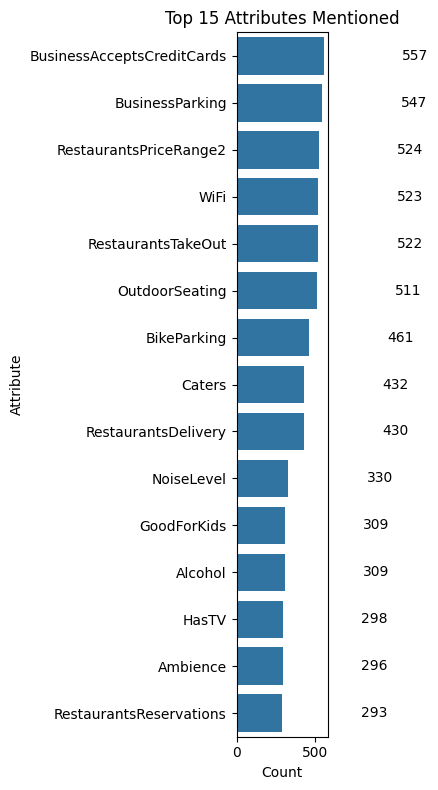

In [6]:
# exploratory data analysis to see how many times each attribute is mentioned in the attributes column

from collections import Counter

# drop rows with missing attributes
attributes_df = cafe_df['attributes'].dropna()

# count number of keys from attributes_df
keys = Counter()
for attr in attributes_df:
    keys.update(attr.keys())

# df of how many times each attribute occurs in the attributes column, sorted in desc order
attr_counts_df = pd.DataFrame.from_dict(keys, orient='index', columns=['count'])
attr_counts_df = attr_counts_df.sort_values(by='count', ascending=False)

top_n = 15
top_attrs = attr_counts_df.head(top_n).reset_index()
top_attrs.columns = ['attribute', 'count']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=top_attrs, y='attribute', x='count')

for i, row in top_attrs.iterrows():
    ax.text(row['count'] + 500, i, str(row['count']), va='center')

plt.title(f'Top {top_n} Attributes Mentioned')
plt.xlabel('Count')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()